# Introduction

The data I will use is that of suicide rates in several countries between 1985-2016. The data can be found on kaggle: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 

My goal with this is to analyze the data to see if there is anything interesting, for example bias towards certain groups and/or correlation between two features. 

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#import libraries 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plots


In [0]:
#import data 
df =  pd.read_csv('gdrive/My Drive/Colab Notebooks/SuicideRatesData.csv')

# Analysing the data
Lets look at the first five datapoints in the dataset. There are several features here that might be interesting to look at, for example age, sex, and GDP. 

In [5]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Lets see what the total amount of suicides were between 1985-2016. 

In [6]:
df['suicides_no'].sum()

6748420

## Sex
6748420 people during 30 years is a lot, and is the equivalent of a small country in Europe. Lets analyze if we can see any group that is overrepresented in the data. We start with analayzing sex. In the plot below we see that males represent about 75% of al suicides in the world. 

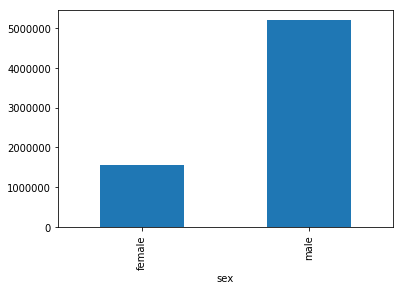

In [7]:
suicide_no_vs_sex = df.groupby(['sex'])['suicides_no'].sum()
suicide_no_vs_sex.plot.bar()

In [0]:
suicide_female = df[df['sex'] == 'female']
suicide_male = df[df['sex'] == 'male']


## Age 
Now we will anlyze the age of thos whom commited suicide. Luckily, the age group 5-14 has a really small number of commited suicides. And the groups 35-54 and 55-74 are the largest ones. However, note that these groupd are also twice as big, as they cover 20 years instead of 10. Thus, assuming that the suicide rate is uniformaly distrubuted within the group, we have similary suicide rates between all the ages groups except 5-14 which is significantly lower. 

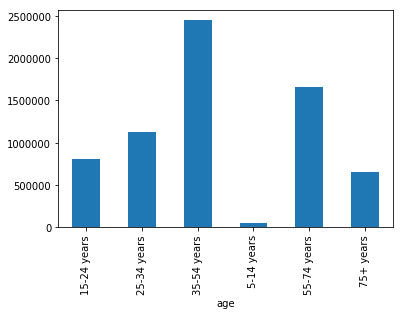

In [8]:
suicide_no_vs_age = df.groupby(['age'])['suicides_no'].sum()
suicide_no_vs_age.plot.bar()


Now we will anayze the difference in disribution between the ages for males and females. The most noteworthy one is that the relative number of suicides in the 5-15 years group is larger for females. Also the groups 55-74 and 75+ is relativly larger in females than in males. 

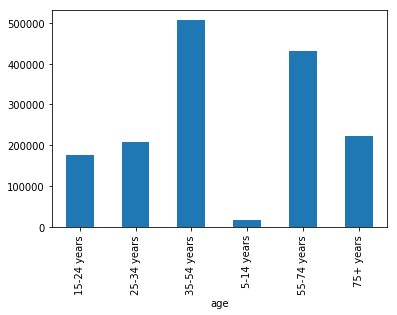

In [18]:
female_suicide_no_vs_age = suicide_female.groupby(['age'])['suicides_no'].sum()
female_suicide_no_vs_age.plot.bar()


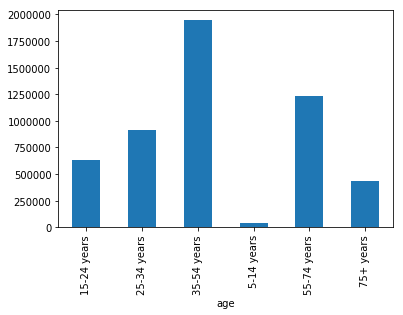

In [19]:
male_suicide_no_vs_age = suicide_male.groupby(['age'])['suicides_no'].sum()
male_suicide_no_vs_age.plot.bar()


Lets analyze the 15-24 years group more. 

In [0]:
young_suicide = df[df['age'] == '15-24 years']


We have the same distributed between the genders as for the entire dataset. 

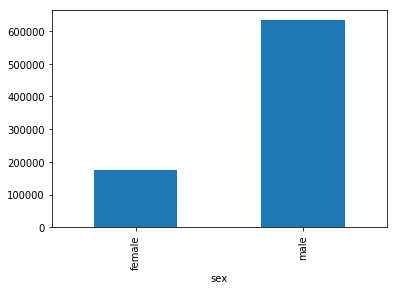

In [24]:
young_suicide_vs_sex = young_suicide.groupby(['sex'])['suicides_no'].sum()
young_suicide_vs_sex.plot.bar()

We seem to have the same distribution over countries as well (see section below), however now it is more evened out. There is also some countries that appear on this plot and not the one for the entire dataset, for exampe New Zealand, Norway, and Guyana. This might indicate that there is an rising problem of mental health in those countries. 

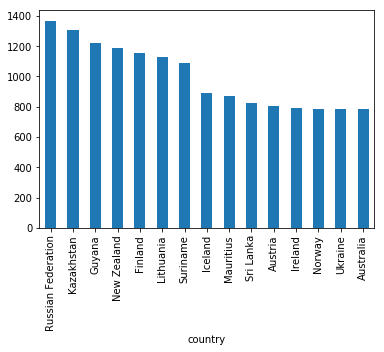

In [25]:
suiciderate_no_vs_country = young_suicide.groupby(['country'])['suicides/100k pop'].sum().nlargest(15)
suiciderate_no_vs_country.plot.bar()

## Country

The country with the largest number of suicides are Russia, USA, and Japan. All are countries with a alrge population. Thus is is better to analyze the suicide rate instead to be able to analyze if certain countries have a bigger problem with mental health than others, not just a large population. 

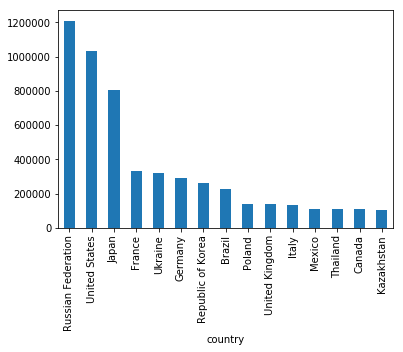

In [9]:
suicide_no_vs_country = df.groupby(['country'])['suicides_no'].sum().nlargest(15)
suicide_no_vs_country.plot.bar()


The countries with the largest suicide rate is Russia, which also had the largest number of sucides. Suprisingly USA are not in the 15 countires with argest suicide rate. Japan is also on the list, but on place 8 instead 3 compared to the absolut number of sucides. 

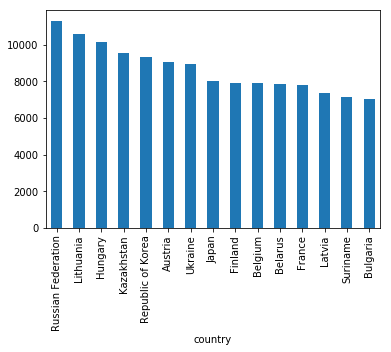

In [10]:
suiciderate_no_vs_country = df.groupby(['country'])['suicides/100k pop'].sum().nlargest(15)
suiciderate_no_vs_country.plot.bar()



Now we will analyze females and males seperatly. 

The top three countires with the largest suicide rate are Republic of Korea, Japan, and Singapore. All are Asian countries which could presumably indicate that there might be a larger mental health prolem in that region compared to other parts of the world. This would need further investigation to be able to find a correlation.  

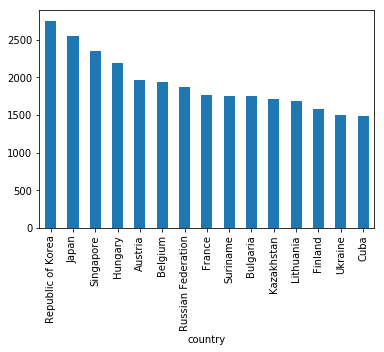

In [15]:
suiciderate_no_vs_country = suicide_female.groupby(['country'])['suicides/100k pop'].sum().nlargest(15)
suiciderate_no_vs_country.plot.bar()



For males, the region of the largest suicide rates seem to be eastern Europe. This would also need further investigation to be able to find a correlation. 

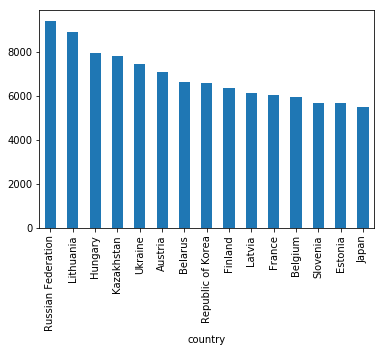

In [16]:
suiciderate_no_vs_country = suicide_male.groupby(['country'])['suicides/100k pop'].sum().nlargest(15)
suiciderate_no_vs_country.plot.bar()



## Year

Now we will analyze the changes between 1985 and 2016 of the suicide rate. Since the population has grown since 1985, the absolut number of suicides could be correlated towards the growth in population. Therefore we will analyze the suicide rate instead. 

Judging from the plot, we seem to have a peak around 1995-200 and the a slow decline. 

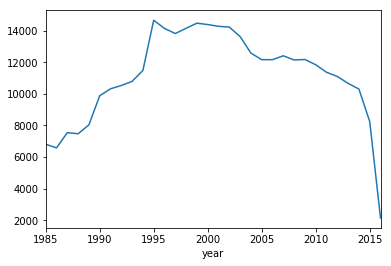

In [32]:
df.groupby(['year'])['suicides/100k pop'].sum().plot()


The same phenomenon can bee seen when analyzing females and males seperatly. 

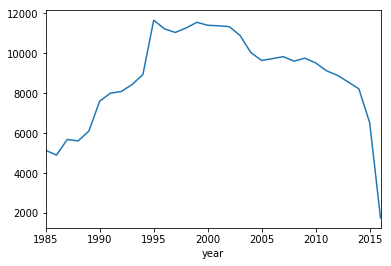

In [33]:
suicide_male.groupby(['year'])['suicides/100k pop'].sum().plot()


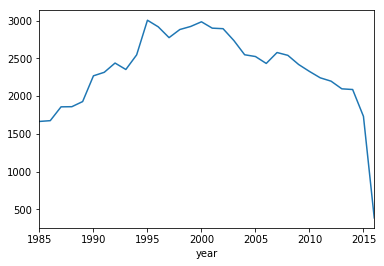

In [34]:
suicide_female.groupby(['year'])['suicides/100k pop'].sum().plot()


## Correlations 

Now we will analyze too see if we can find any correlation between the suiciderate and any other feature. 

We will start with the GDp per capita, and as we can see in the plot below there seems to be little correlation. What could be said is that countries with lower gdp per capita have a larger spread in the sucide rate. All datapoints with suciderate over 100 also have a gdp per capita lower than 60 000. The most extreme sucide rate are also in countries with gdp per capita lower than 40 000. This indicated that there is a connection between the gdp per capita and the suicide rate.

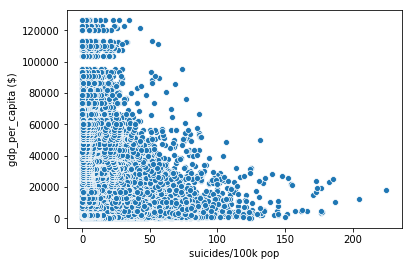

In [17]:
import seaborn as sns
sns.scatterplot(x="suicides/100k pop", y="gdp_per_capita ($)", data=df)


Now we will anayze with the help of a heatmat utilizing pearson correlation to see the correlation between features. 

As we can see, the number of sucides is correlated with the population. However, the suicide rate is not, indicating that the sucide rate is uniformaly distriuted over the population and is not a side effect of larger population. Suprinsingly there is no correlation between suicide rate and the gdp per capita. 

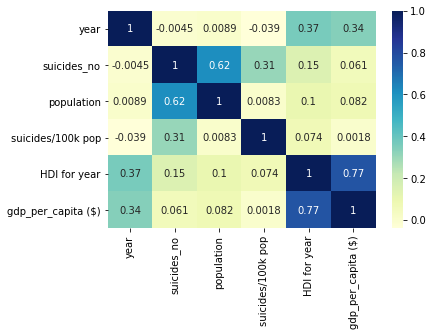

In [21]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()